### Flavia Carravieri
# <span style="color:deeppink">NSL - ESERCIZIO 10  </span>

### Esercizio 10.1

Si è parallelizzato l'algoritmo genetico dell'esercitazione precedente con le librerie MPI per compiere 11 ricerche parallele, chiamate *continenti*. Le ricerche sono indipendenti, ma ogni 50 generazioni un continente scambia i suoi 50 peggiori individui con i 50 migliori del continente affianco.  

Si riporta di seguito il risultato ottenuto per la stessa consegna del 9.1, per verificare con un caso semplice la corretta esecuzione dell'algoritmo. 

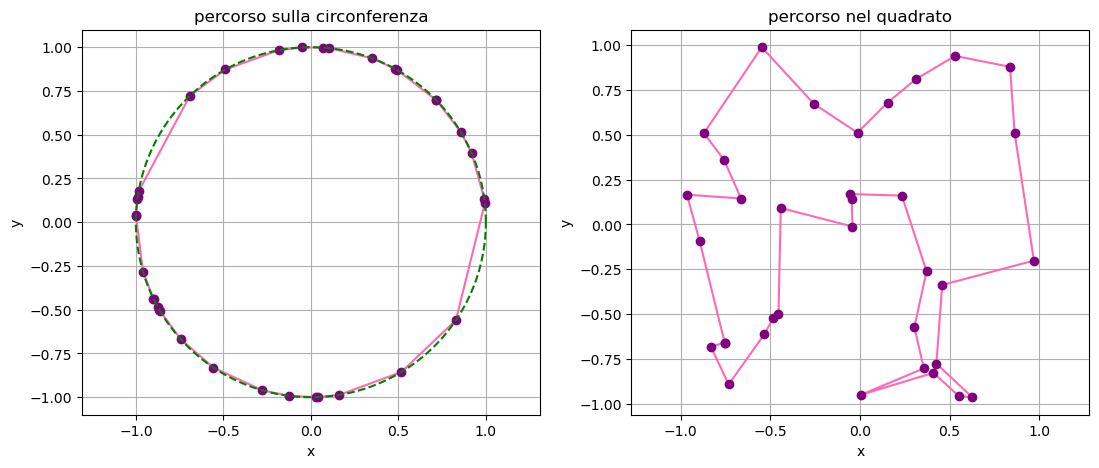

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Carica i dati, saltando la prima riga
x_c, y_c = np.loadtxt('esercizio10.1/simulazioni_eseguite/best_path.dat', skiprows=1, unpack=True)

# 2. Chiudi il percorso aggiungendo il primo punto alla fine
x_c = np.append(x_c, x_c[0])
y_c = np.append(y_c, y_c[0])

# 3. Circonferenza unitaria (opzionale)
theta = np.linspace(0, 2*np.pi, 500)
circle_x = np.cos(theta)
circle_y = np.sin(theta)

x_q, y_q = np.loadtxt('esercizio10.1/simulazioni_eseguite/best_path_sqr.dat', skiprows=1, unpack=True)
x_q = np.append(x_q, x_q[0])
y_q = np.append(y_q, y_q[0])

fig, axs = plt.subplots(1,2, figsize=(13, 5))

# 4. Plot

axs[0].plot(x_c, y_c, color='hotpink', marker='o',mec='purple', mfc='purple') 
axs[0].plot(circle_x, circle_y, 'g--')
axs[0].axis('equal')
axs[0].grid()
axs[0].set_title('percorso sulla circonferenza')
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")

axs[1].plot(x_q, y_q, color='hotpink', marker='o', mec='purple', mfc='purple')
axs[1].axis('equal')
axs[1].grid()
axs[1].set_title('percorso nel quadrato')
axs[1].set_xlabel("x")
axs[1].set_ylabel("y")

plt.show()

### Exercise 10.2

Per applicare il problema del commesso viaggiatore ai 110 capoluoghi di provincia italiani è stato necessario eseguire una simulazione più lunga e con più rimescolamento dei dati. In particolare si sono usate popolazioni da 700 individui riprodotte per 1000 generazioni; le migrazioni avvenivano ogni 90 generazioni con 100 individui e la probabilità di crossover è stata aumentata all'80%. 
Si è così ottenuto un percorso con $L^2=63.7416$. 

Il tempo di simulazione è lungo ma il codice può essere reso più efficiente ad esempio nel calcolo delle distanze, che ora viene ripetuto da zero ogni volta che viene chiamata la funzione get_dist(), e nella sua organizzazione, appesantita dal portare sempre con se le coordinate di ogni città. 

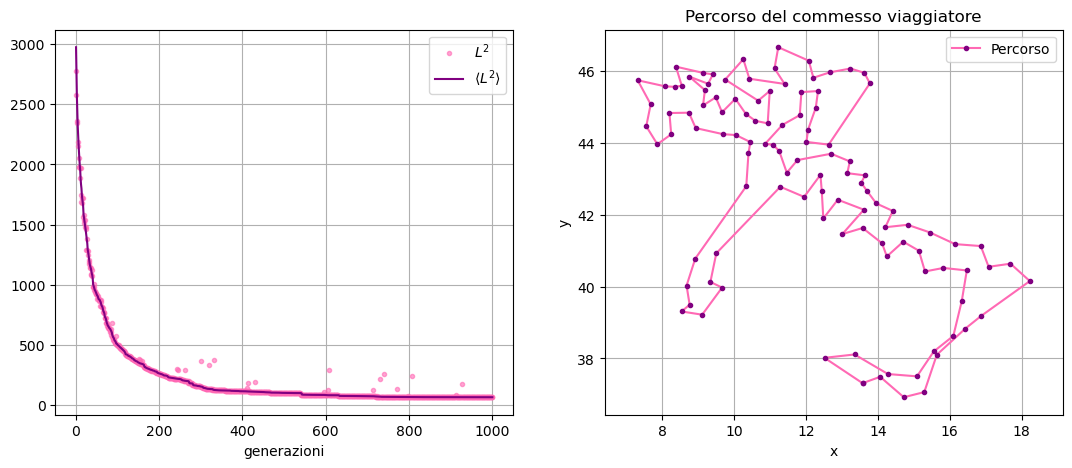

In [31]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Carica i dati, saltando la prima riga
data = np.loadtxt('esercizio10.2/best_path.dat', skiprows=1)
x = data[:, 0]
y = data[:, 1]

# 2. Chiudi il percorso aggiungendo il primo punto alla fine
x = np.append(x, x[0])
y = np.append(y, y[0])

L_ave=np.loadtxt('esercizio10.2/ave_per_gen6.dat', usecols=(1))
L_x, L=np.loadtxt('esercizio10.2/lunghezza_per_gen_6.dat', usecols=(0,1), unpack=True)

#fig, axs=plt.subplot(1,2, figsize=(10,5))
fig, axs = plt.subplots(1,2, figsize=(13, 5))

# 4. Plot
axs[0].plot(L_x, L, color='hotpink', label=r'$L^2$', linestyle='', marker='o', markersize=3, alpha=0.6)
axs[0].plot(L_x, L_ave, color='purple', label=r'$\langle L^2 \rangle$')
axs[0].legend()
axs[0].grid()
axs[0].set_xlabel('generazioni')

axs[1].plot(x, y, color='hotpink', marker='o', label='Percorso',markersize=3, mec='purple', mfc='purple')       # linee tra i punti
axs[1].axis('equal')
axs[1].grid(True)
axs[1].legend()
axs[1].set_title("Percorso del commesso viaggiatore")
axs[1].set_xlabel("x")
axs[1].set_ylabel("y")
plt.show()